In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [3]:
project_root = Path("__file__").resolve().parent.parent

In [4]:
insurance_dataset = project_root / "data" / "raw" / "insurance.csv"

In [5]:
df = pd.read_csv(filepath_or_buffer=insurance_dataset, sep=",")

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df_copy = df.copy()

In [8]:
# let's start by checking the state of the dtypes of the dataframe and the information
df.info(memory_usage="deep", buf=None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 255.2 KB


In [9]:
df = df.astype(dtype={"sex": "category", "smoker": "category", "region": "category"})

In [10]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


In [12]:
# Statistics de notre dataframe
df.describe(include="number").round(decimals=2)

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


## Exploratory Analysis and Visualization with Python

In [13]:
sns.set_style(style="darkgrid")
plt.rcParams["figure.figsize"] = (12, 7)
plt.rcParams["font.size"] = 14
plt.rcParams["font.weight"] = "bold"

plt.rcParams["axes.labelsize"] = 12
plt.rcParams["axes.labelweight"] = "bold"

## Age
Age is a crucial factor in determining insurance costs. Generally, as individuals age, their health risks increase, leading to higher insurance premiums. Analyzing the age distribution of policyholders can help insurers tailor their offerings and pricing strategies. The age column has a minimum value of 18 and a maximum value of 64, with a mean age of approximately 39.2 years.So we have to plot the histogram with a bins of 47, to ensure we have one bins by age.

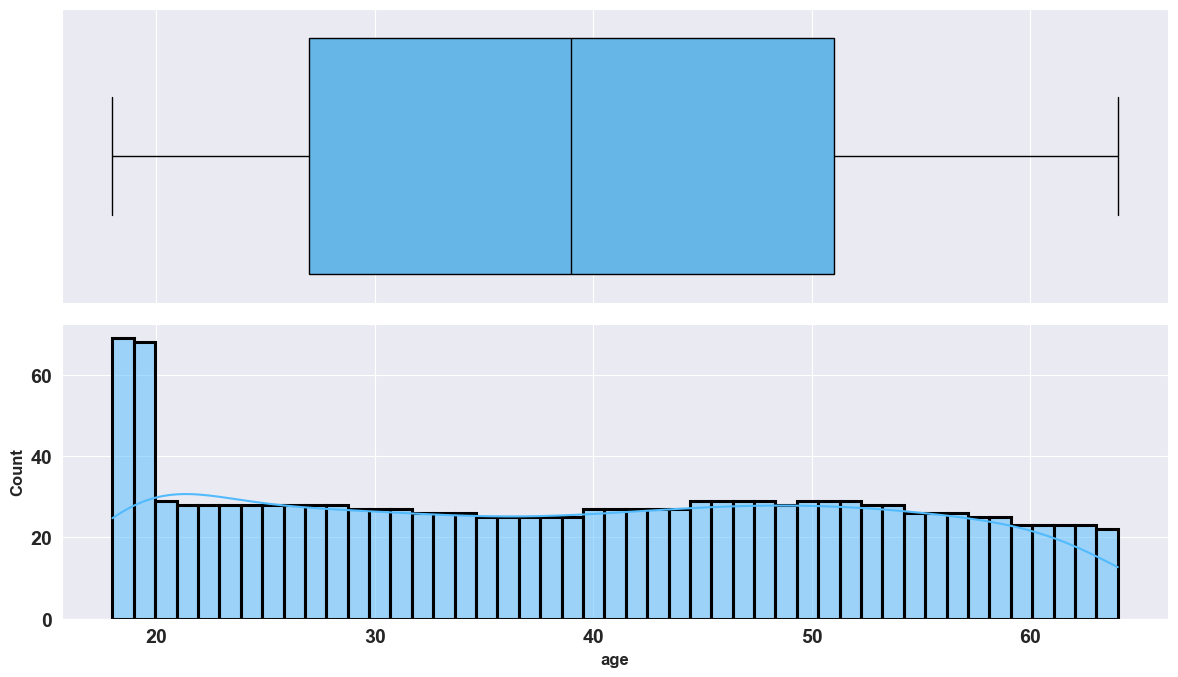

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True)
sns.histplot(
    data=df,
    x="age",
    color="#51BBFE",
    edgecolor="k",
    linewidth=2.2,
    bins=47,
    kde=True,
    element="bars",
    ax=axes[1],
)

sns.boxplot(data=df, x="age", color="#51BBFE", linecolor="k", whis=1.5, ax=axes[0])
plt.tight_layout()
plt.show()

The distribution of ages is almost uniform across the dataset, with a slight peak around the ages of 18 and 19. The differents ages seems to have roughly similar number of customers(around 20 and 25), except of the 18 and 19 years which seems to have twice the number of customers compared to the other ages.

# BMI
BMI (Body Mass Index) is a significant indicator of an individual's health status and is often used by insurance companies to assess risk. A higher BMI can be associated with increased health risks, which may lead to higher insurance premiums. The BMI column in the dataset has a minimum value of 15.96 and a maximum value of 53.13, with a mean BMI of approximately 30.66. To visualize the distribution of BMI values, we can create a histogram with 38 bins to see each value of the bins column.

In [21]:
df["bmi"].describe(percentiles=[0.25, 0.5, 0.75])

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [22]:
bmi_bins = int(df["bmi"].max() - df["bmi"].min())

In [23]:
bmi_bins

37

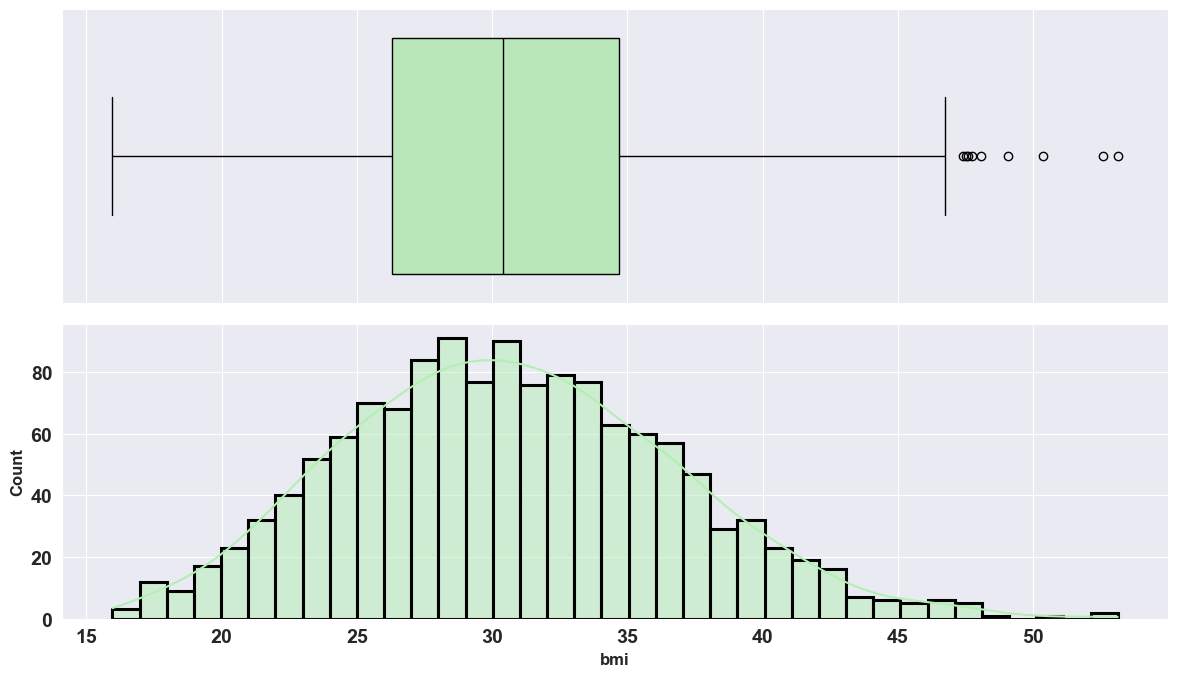

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True)
sns.histplot(
    data=df,
    x="bmi",
    kde=True,
    color="#B3EFB2",
    linewidth=2.2,
    edgecolor="k",
    element="bars",
    bins=bmi_bins,
    ax=axes[1],
)

sns.boxplot(data=df, x="bmi", linecolor="k", color="#B3EFB2", whis=1.5, ax=axes[0])
plt.tight_layout()
plt.show()

Common BMI Categories (Adults)
- Underweight: Below 18.5
- Healthy Weight: 18.5 – 24.9
- Overweight: 25.0 – 29.9
- Obesity: 30.0 or higher (further classified into Class I, II, III)

# Charges
Insurance charges are a critical aspect of the dataset, as they represent the cost incurred by individuals for their insurance coverage. Also this column is the target variable for our prediction model.

In [25]:
df["charges"].describe(percentiles=[0.25, 0.5, 0.75])

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

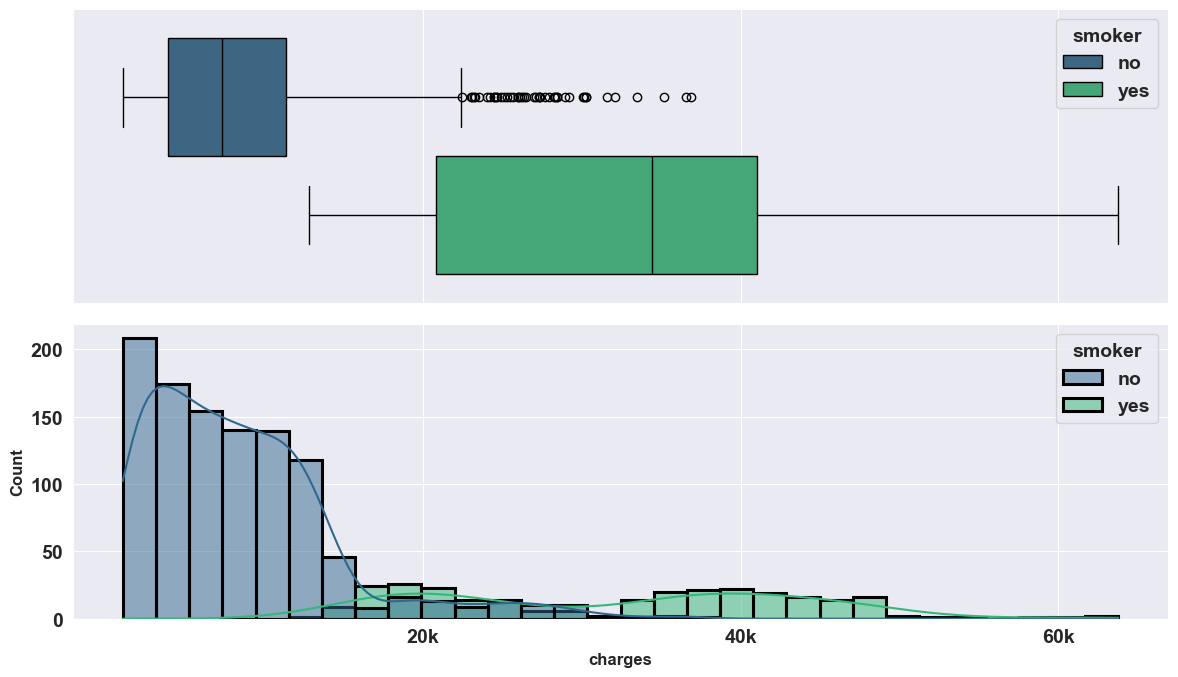

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True)
sns.histplot(
    data=df,
    x="charges",
    element="bars",
    kde=True,
    edgecolor="k",
    linewidth=2.2,
    ax=axes[1],
    hue="smoker",
    palette="viridis",
)
axes[1].set_xticks(ticks=[20_000, 40_000, 60_000], labels=["20k", "40k", "60k"])

sns.boxplot(
    data=df,
    x="charges",
    linecolor="k",
    whis=1.5,
    ax=axes[0],
    hue="smoker",
    palette="viridis",
)
plt.tight_layout()
plt.show();

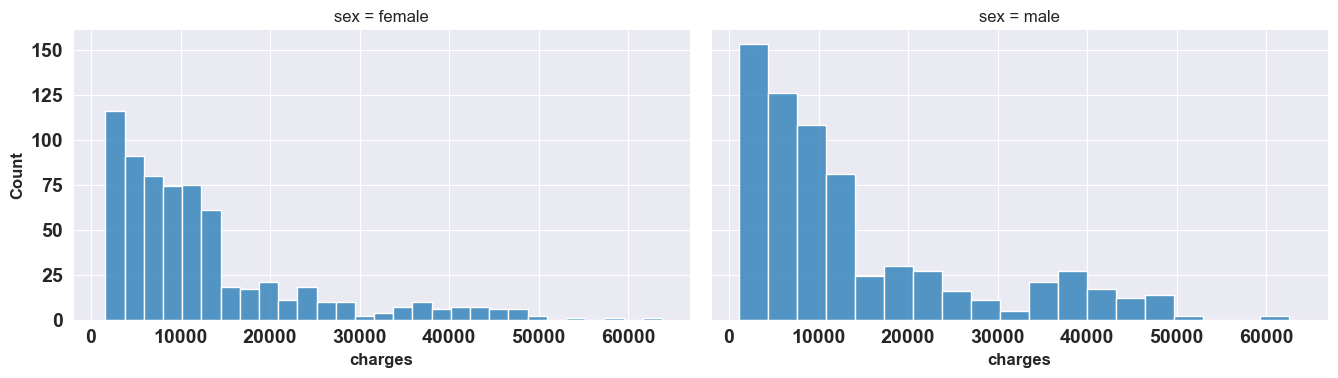

In [27]:
# now let's visualise the distribution of the charges by sex and region
g = sns.FacetGrid(
    data=df, col="sex", row_order=["male", "female"], aspect=1.7, height=4
)
g.map(sns.histplot, "charges")

plt.tight_layout()
plt.show()

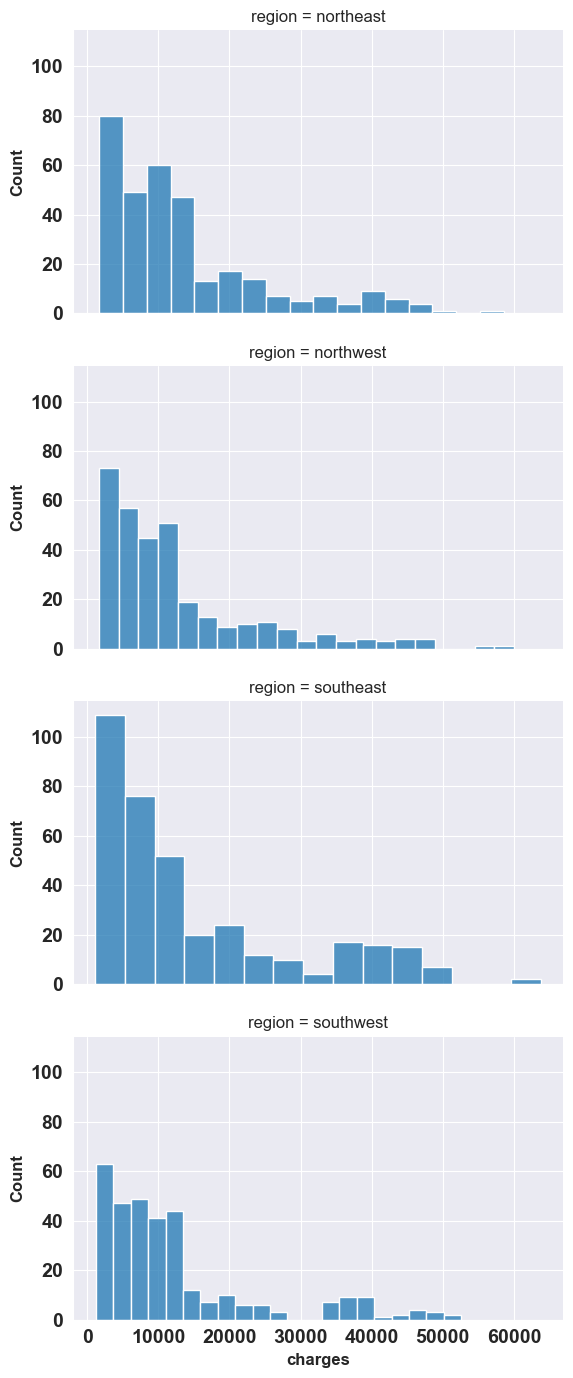

In [28]:
# now let's split the charges distribution by the region
g = sns.FacetGrid(data=df, row="region", aspect=1.7, height=3.5)
g.map(sns.histplot, "charges")

plt.tight_layout()
plt.show()

# Conclusion
So both region and sex don't influence the insurance charges distribution. However, smokers have significantly higher insurance charges compared to non-smokers, indicating that smoking status is a crucial factor in determining insurance costs.

# Smoker
now let's check the different number of smokers and non-smokers in the dataset.

In [29]:
df.value_counts(
    subset="smoker", dropna=True, normalize=True, sort=True, ascending=False
)

smoker
no     0.795217
yes    0.204783
Name: proportion, dtype: float64

# Smoker
It appears that 20% of the individuals in the dataset are smokers, while 80% are non-smokers. This indicates that the majority of the population represented in the dataset does not smoke. We can also see that smoking habit is more common among males.

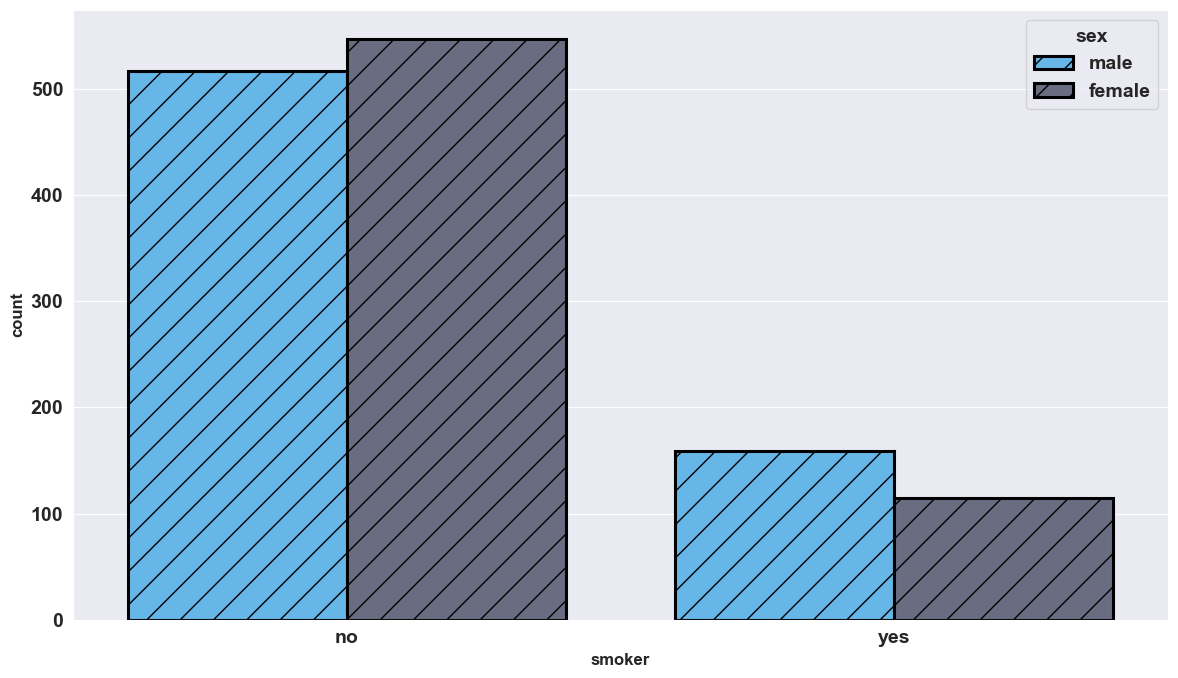

In [30]:
# let's use a countplot to see the number
sns.countplot(
    data=df,
    x="smoker",
    hatch="/",
    edgecolor="k",
    linewidth=2.2,
    palette=["#51BBFE", "#666A86"],
    stat="count",
    hue="sex",
    hue_order=["male", "female"],
)
plt.tight_layout()
plt.show()

# Age vs Charges
To further understand the relationship between age and insurance charges, we can create a scatter plot. This visualization will help us identify any trends or patterns in how insurance charges vary with age.

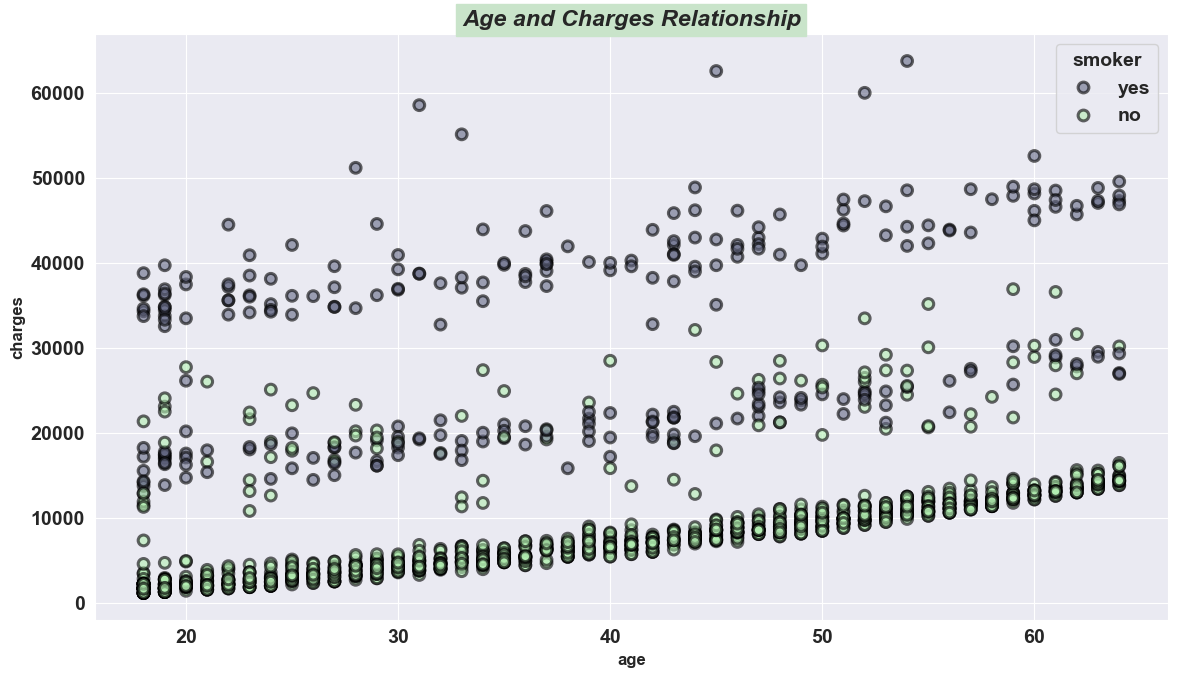

In [31]:
sns.scatterplot(
    data=df,
    x="age",
    y="charges",
    hue="smoker",
    palette=["#666A86", "#B3EFB2"],
    s=60,
    ec="k",
    lw=2.2,
    hue_order=["yes", "no"],
    alpha=0.6,
)
plt.title(
    label="Age and Charges Relationship",
    fontweight="bold",
    fontstyle="italic",
    backgroundcolor="#C9E4CA",
)
plt.tight_layout()
plt.show()

In [19]:
import plotly.express as px

In [20]:
# let's also use plotly to plot this graph with more interactivity
fig = px.scatter(
    data_frame=df,
    x="age",
    y="charges",
    color="smoker",
    hover_data="sex",
    title="Age and Charges Relationship",
    opacity=0.6,
)
fig.update_traces(marker_size=6)
fig.show()

# Trends Observed
1. Positive Correlation: There is a clear positive correlation between age and insurance charges. As age increases, insurance charges tend to increase as well. This trend is expected, as older individuals are generally at higher risk for health issues, leading to higher insurance costs.
2. We see with the smoker as a hue, that smoker is separated in two different clusters, one for the smoker with lower charges, and the other for the smoker with higher charges, and both clusters shows a linear increase in charges as the age increases.
3. Also the first cluster we see in the plot shows presumably non-smokers individuals who are healthy and thus have lower insurance charges
4. The second cluster shows a mix of smokers and non-smokers individuals with higher insurance charges. It is possible it is two overlapping clusters, one for non-smokers with health issues and thus higher charges, and the other for smokers without major health issues but still having higher charges.
5. The final cluster shows smokers with significantly higher insurance charges, indicating that they have major health issues likely due to smoking, leading to substantially increased insurance costs.

# BMI vs Charges
To further explore the relationship between BMI and insurance charges, we can create a scatter plot. This visualization will help us identify any trends or patterns in how insurance charges vary with BMI.

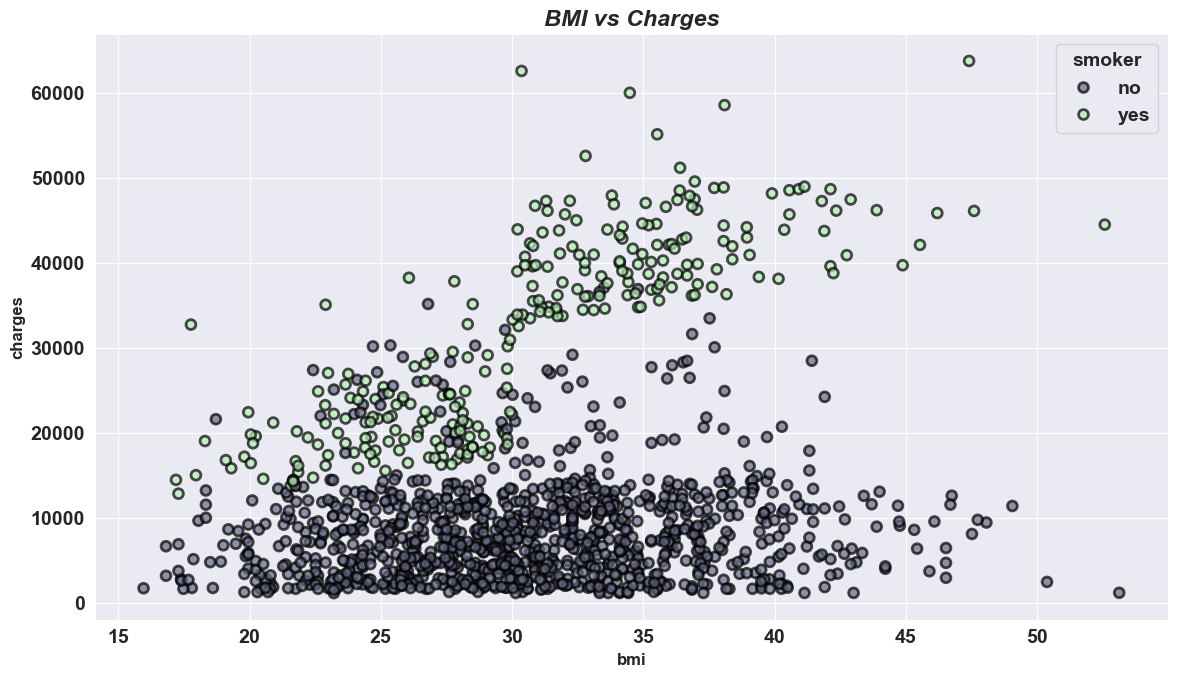

In [17]:
# with seaborn
sns.scatterplot(
    data=df,
    x="bmi",
    y="charges",
    s=50,
    alpha=0.7,
    palette=["#666A86", "#B3EFB2"],
    edgecolor="k",
    linewidth=2.0,
    hue="smoker",
)
plt.title(label="BMI vs Charges", fontweight="bold", fontstyle="italic")
plt.tight_layout()
plt.show();

In [32]:
# let's also plot this with plotly.express
fig = px.scatter(
    data_frame=df,
    x="bmi",
    y="charges",
    color="smoker",
    opacity=0.7,
    hover_data="sex",
    title="BMI vs Charges",
)
fig.update_traces(marker_size=5)
fig.show()

# Conclusion
In general we don't see a linear relationship between BMI and insurance charges, however when we split the data between smokers and non-smokers, we can see that for non-smokers there is any clear relationship between BMI and charges, whereas for smokers there is a clear positive correlation between BMI and insurance charges. As BMI increases, insurance charges tend to increase as well for smokers. This trend suggests that higher BMI among smokers may contribute to increased health risks, leading to higher insurance costs.

## Charges vs categorical columns (sex, region, children, smoker)

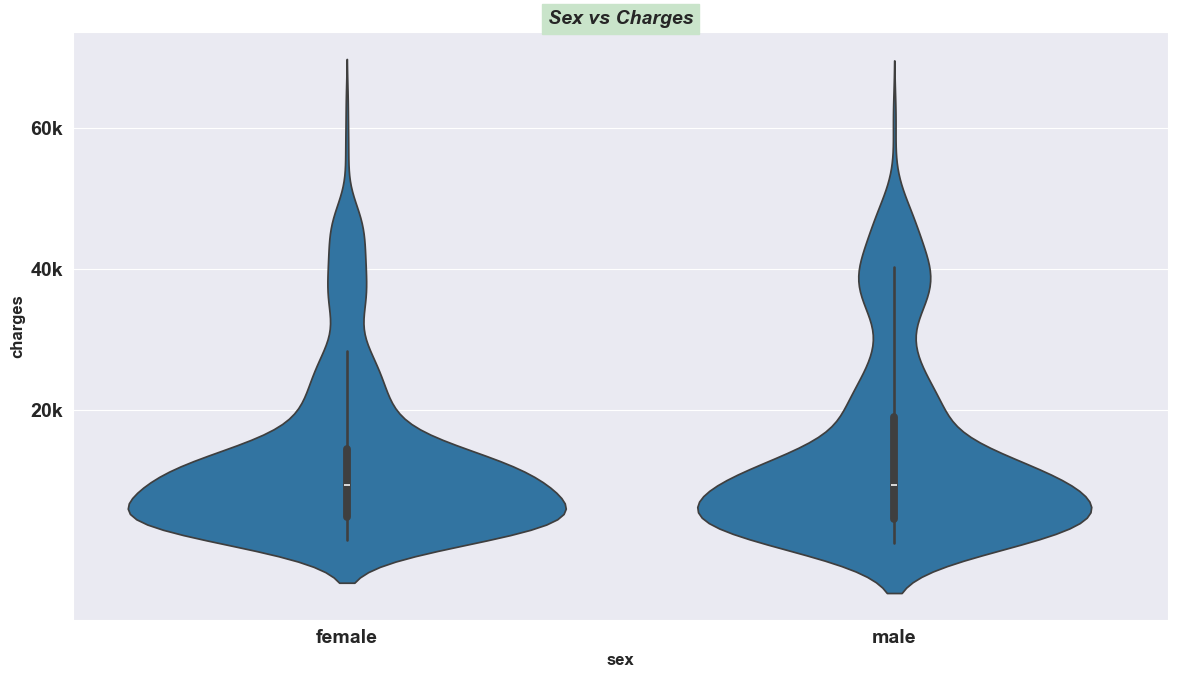

In [33]:
# let's plot a violinplot to see the distribution of the charges splitted by the sex
sns.violinplot(data=df, x="sex", y="charges")
plt.title(
    label="Sex vs Charges",
    fontsize=14,
    fontweight="bold",
    fontstyle="italic",
    backgroundcolor="#C9E4CA",
)
plt.yticks(ticks=[20_000, 40_000, 60_000], labels=["20k", "40k", "60k"])
plt.tight_layout()
plt.show()

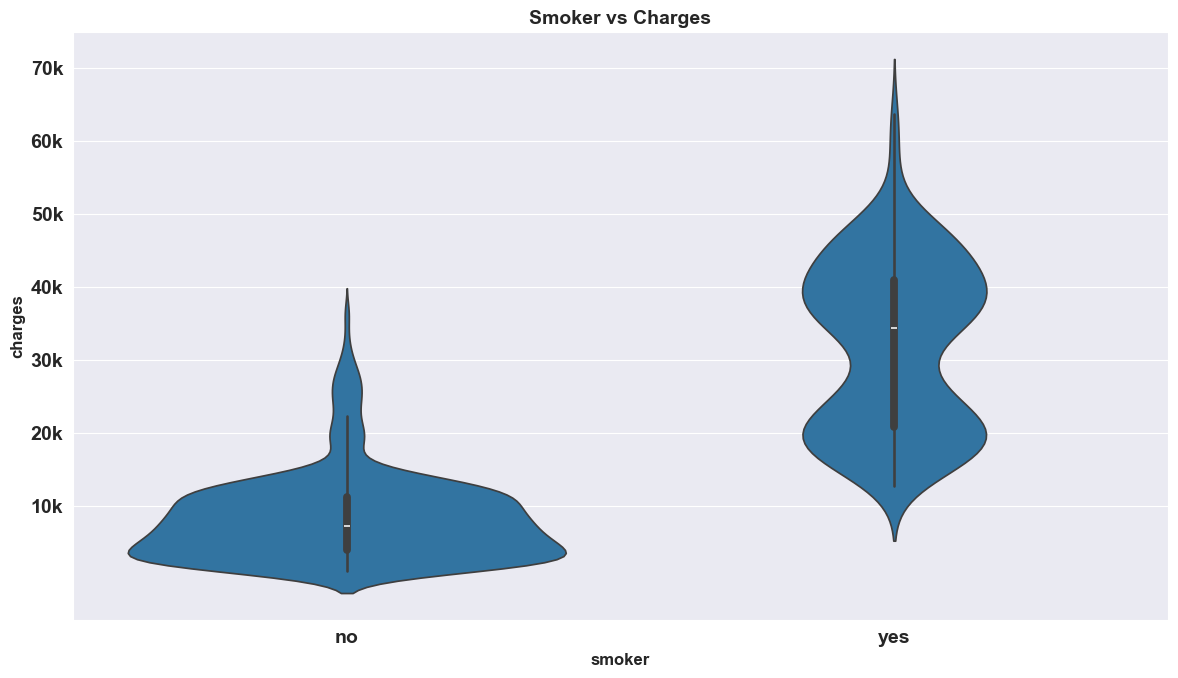

In [34]:
# by smoker
sns.violinplot(data=df, x="smoker", y="charges")
plt.title(label="Smoker vs Charges", fontsize=14, fontweight="bold")
plt.yticks(
    ticks=np.arange(start=10_000, stop=80_000, step=10_000),
    labels=[f"{i}k" for i in range(10, 80, 10)],
)
plt.tight_layout()
plt.show();

# conclusion
This analysis highlights the significant impact of smoking status on insurance charges, while also revealing nuanced relationships between other factors like age, BMI, and insurance costs. The data shows that smoking is a major determinant of insurance charges, with smokers consistently facing higher costs than non-smokers.

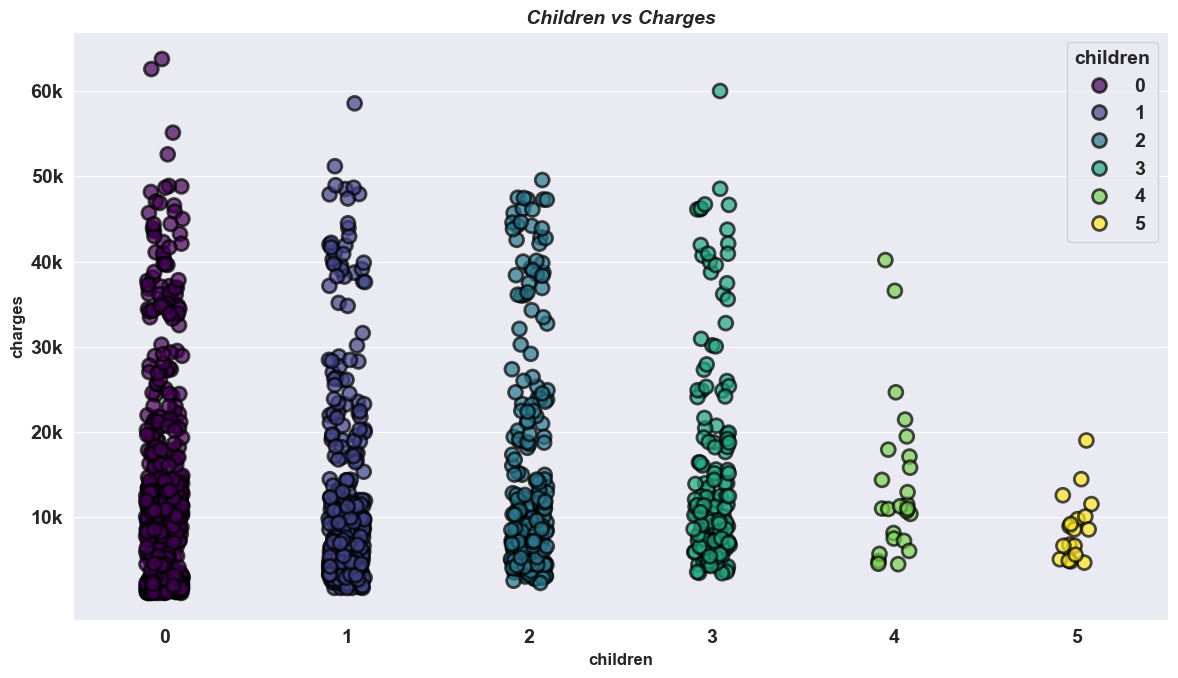

In [35]:
# now let's plot a stripplot and a violinplot to see how children is correlated to charges
sns.stripplot(
    data=df,
    x="children",
    y="charges",
    s=10,
    jitter=True,
    edgecolor="k",
    hue="children",
    palette="viridis",
    alpha=0.7,
    linewidth=2.0,
)
plt.yticks(
    ticks=np.arange(start=10_000, stop=70_000, step=10_000),
    labels=[f"{i}k" for i in range(10, 70, 10)],
)
plt.title(
    label="Children vs Charges", fontsize=14, fontweight="bold", fontstyle="italic"
)
plt.tight_layout()
plt.show();

In [36]:
df["children"].value_counts(normalize=False, sort=True, ascending=False, dropna=True)

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

# The correlation: now let's see how the column is correlated with the target column 'charges'

In [37]:
df["age"].corr(other=df["charges"])

np.float64(0.29900819333064776)

In [38]:
df["bmi"].corr(other=df["charges"])

np.float64(0.1983409688336289)

## now let's see the correlation between charges and smoker, but first let's transform the smoker column into numerical values.

In [39]:
df["smoker_numerical"] = df["smoker"].map(arg={"yes": 1, "no": 0})

In [40]:
df["smoker_numerical"].corr(other=df["charges"])

np.float64(0.7872514304984778)

## let's do the same with the sex column

In [41]:
df["sex_numerical"] = df["sex"].apply(func=lambda x: 1 if x == "male" else 0)

In [42]:
df["sex_numerical"].corr(other=df["charges"])

np.float64(0.05729206220202534)

## with children

In [43]:
df["children"].corr(other=df["charges"])

np.float64(0.06799822684790487)

## Matrix of correlation

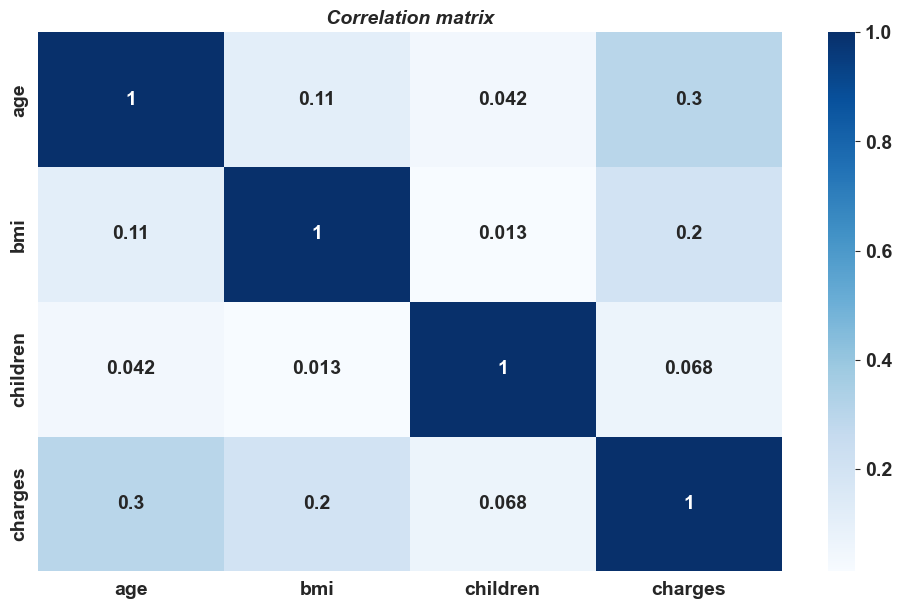

In [44]:
corr_matrix = df.corr(numeric_only=True, method="pearson")

sns.heatmap(data=corr_matrix, cmap="Blues", annot=True)
plt.title(
    label="Correlation matrix", fontsize=14, fontweight="bold", fontstyle="italic"
)
plt.show()

# Linear Regression using a single 
We know that the 'smoker' and 'age' columns have the highest correlation with the target column 'charges', so let's build a linear regression model using only the age for the non-smokers data.

In [45]:
# first let's filter our dataframe
non_smoker_df = df.query(expr="smoker != 'yes'", inplace=False)

In [46]:
non_smoker_df["smoker"].unique()

['no']
Categories (2, object): ['no', 'yes']

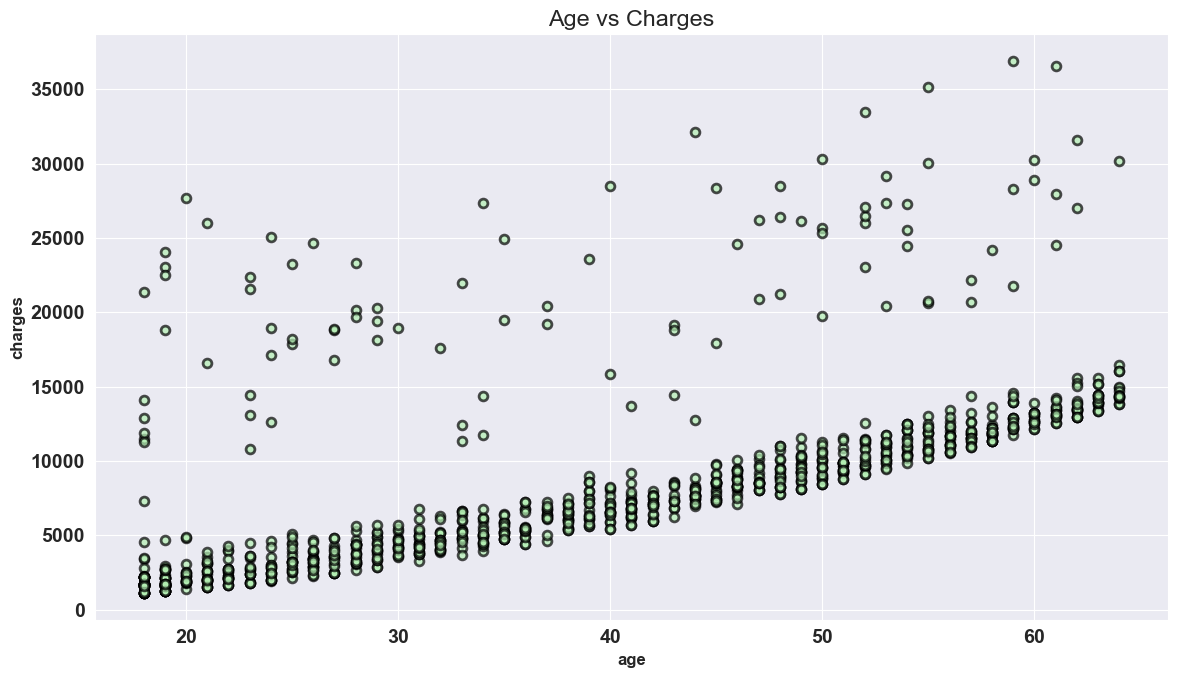

In [47]:
# now let's visualize the relationships between age and charges
sns.scatterplot(
    data=non_smoker_df,
    x="age",
    y="charges",
    s=40,
    alpha=0.7,
    color="#B3EFB2",
    edgecolor="k",
    linewidth=2.0,
)
plt.title(label="Age vs Charges")
plt.tight_layout()
plt.show()

# Model:
We're assuming there's the following relationships between ages and charges for non-smokers:
charges = w * age + b

We'll try to find the best values for w and b that best fit the data.
- The w and b values are called parameters.
- The process of finding the best parameters is called training the model.

Let's now define a function that takes as input the age, w and b values and returns the predicted charges.

In [48]:
def estimate_charges(ages, w, b):
    return w * ages + b

### This is our first model implementation !

In [49]:
# let's guess the value for w and b and used them to predict the value of charges
w = 50
b = 100

ages = non_smoker_df.age

predicted_charges = estimate_charges(ages, w, b)

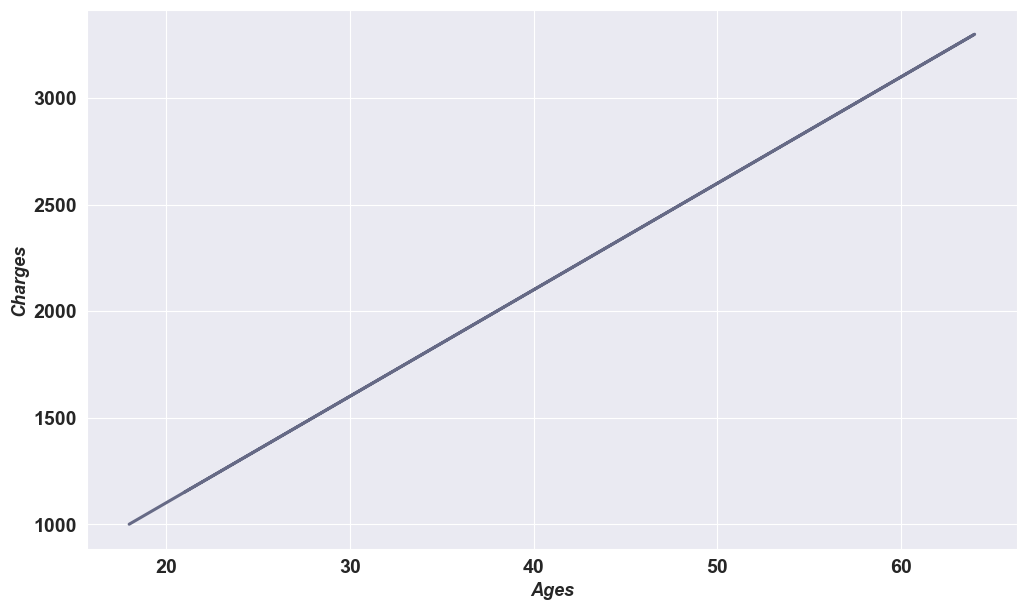

In [50]:
# let's plot this
plt.plot(ages, predicted_charges, lw=2.2, c="#666A86")
plt.xlabel(xlabel="Ages", fontsize=13, fontweight="bold", fontstyle="italic")
plt.ylabel(ylabel="Charges", fontsize=13, fontweight="bold", fontstyle="italic")
plt.show();

In [51]:
# now we can add the real value, I mean by that the charges values in the `non_smoker_df`
target_values = non_smoker_df["charges"]

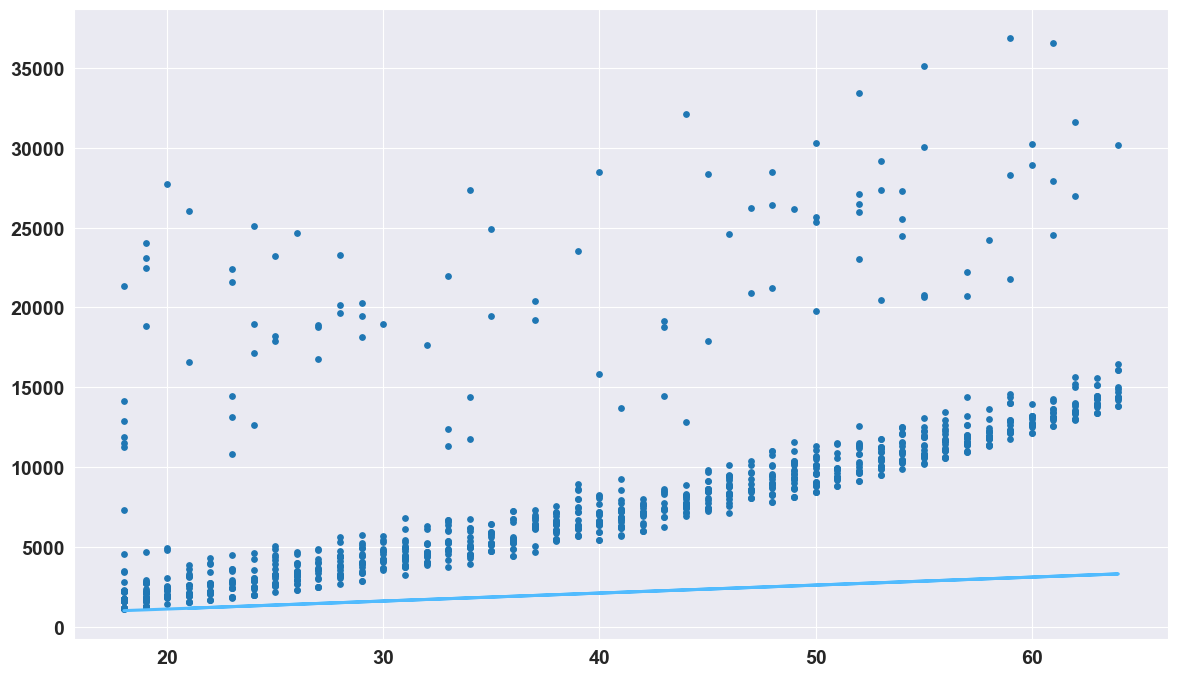

In [52]:
plt.plot(ages, predicted_charges, lw=2.2, c="#51BBFE")
plt.scatter(ages, target_values, s=15)
plt.tight_layout()
plt.show()

In [53]:
non_smoker_df

,age,sex,bmi,children,smoker,region,charges,smoker_numerical,sex_numerical
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
5,31,female,25.740,0,no,southeast,3756.62160,0,0
...,...,...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500,0,0
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0


In [54]:
# let's compare the predicted value and the real value
non_smoker_df.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [55]:
predicted_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [56]:
# creation of a function to see the performance of our model
def try_parameters(w: float, b: float) -> None:
    feature = non_smoker_df["age"]
    target = non_smoker_df["charges"]

    predicted_values = estimate_charges(ages=feature, w=w, b=b)

    # The plot to compare the result to the real data
    fig, ax = plt.subplots(nrows=1, ncols=1)
    ax.plot(feature, predicted_values, c="#A6B1E1", lw=2.2)
    ax.scatter(
        feature, target, s=60, alpha=0.6, color="#424874", linewidths=2.2, edgecolor="k"
    )
    plt.tight_layout()
    plt.show()

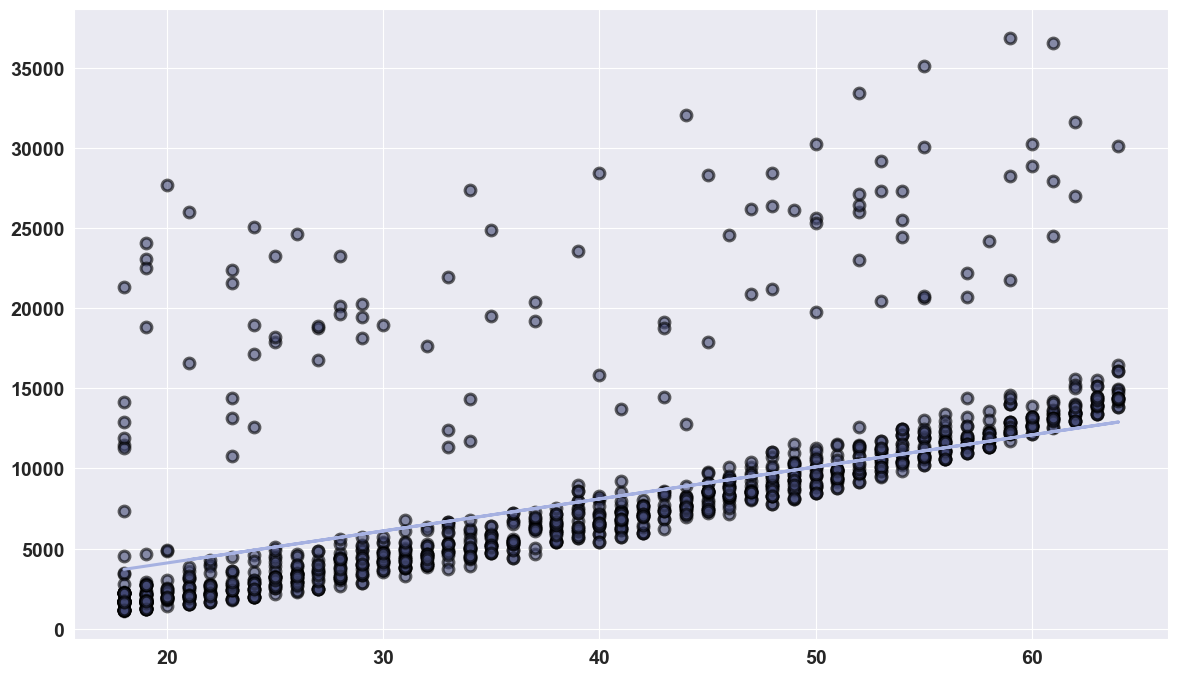

In [57]:
# now let's start the verification with new parameters
try_parameters(w=200, b=100)

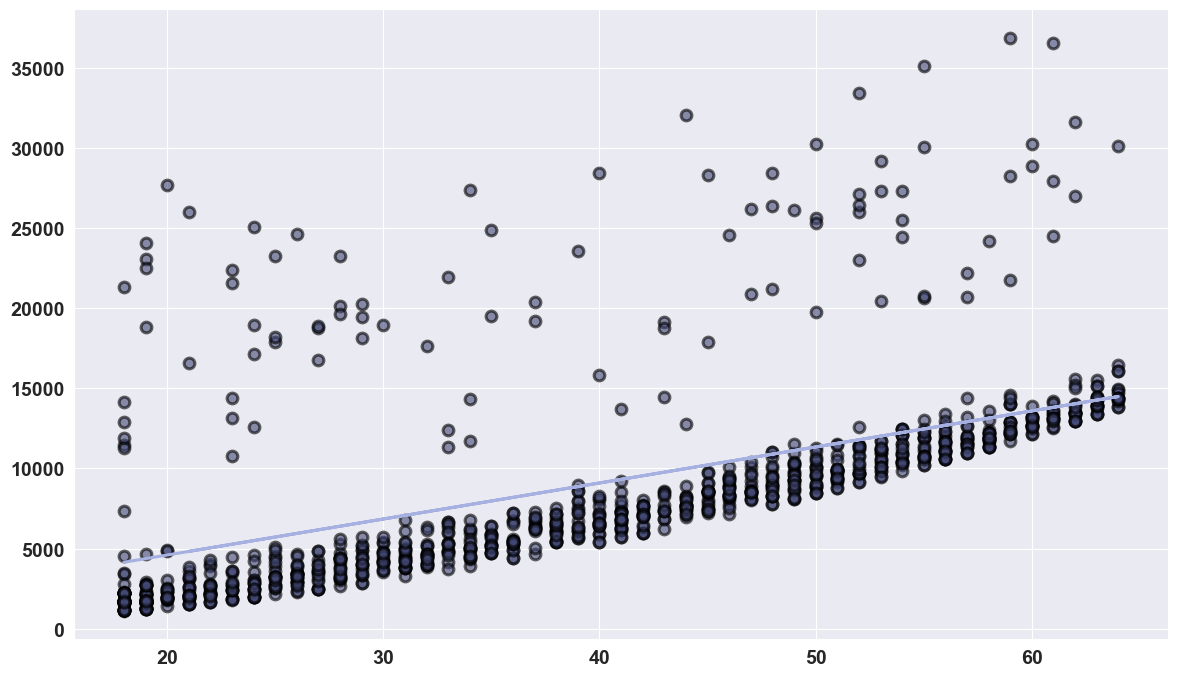

In [58]:
# let's try values of w and b to see how the model is predicting the values
try_parameters(w=225, b=95)

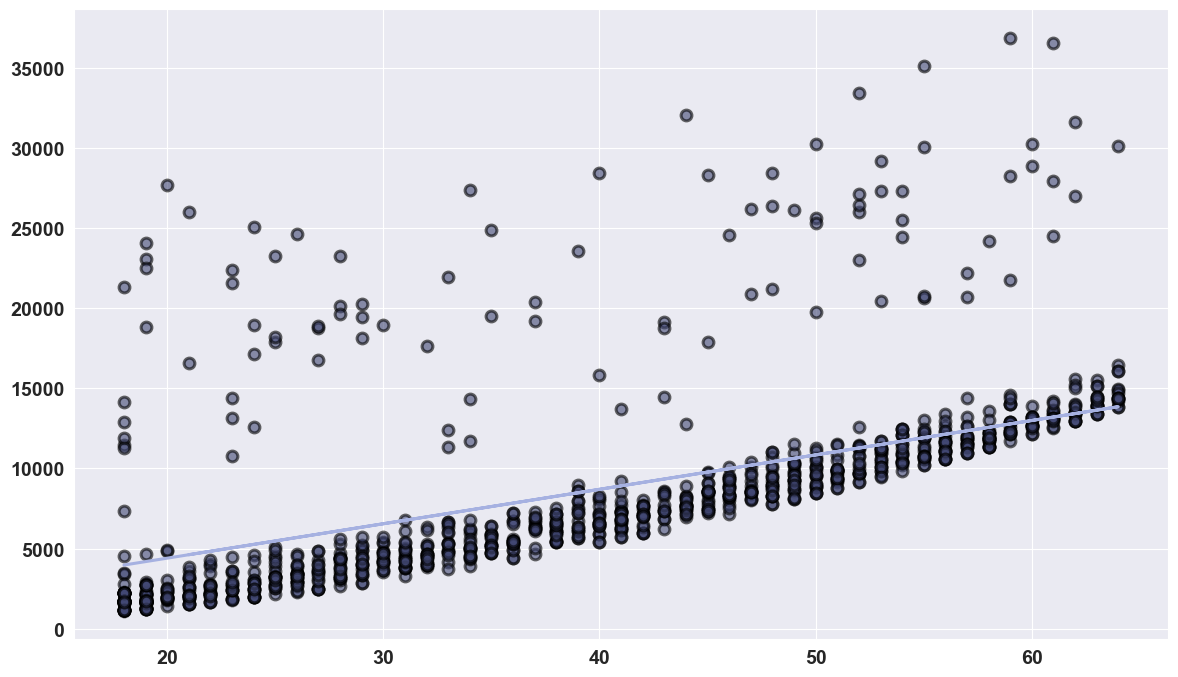

In [59]:
try_parameters(w=215, b=99)

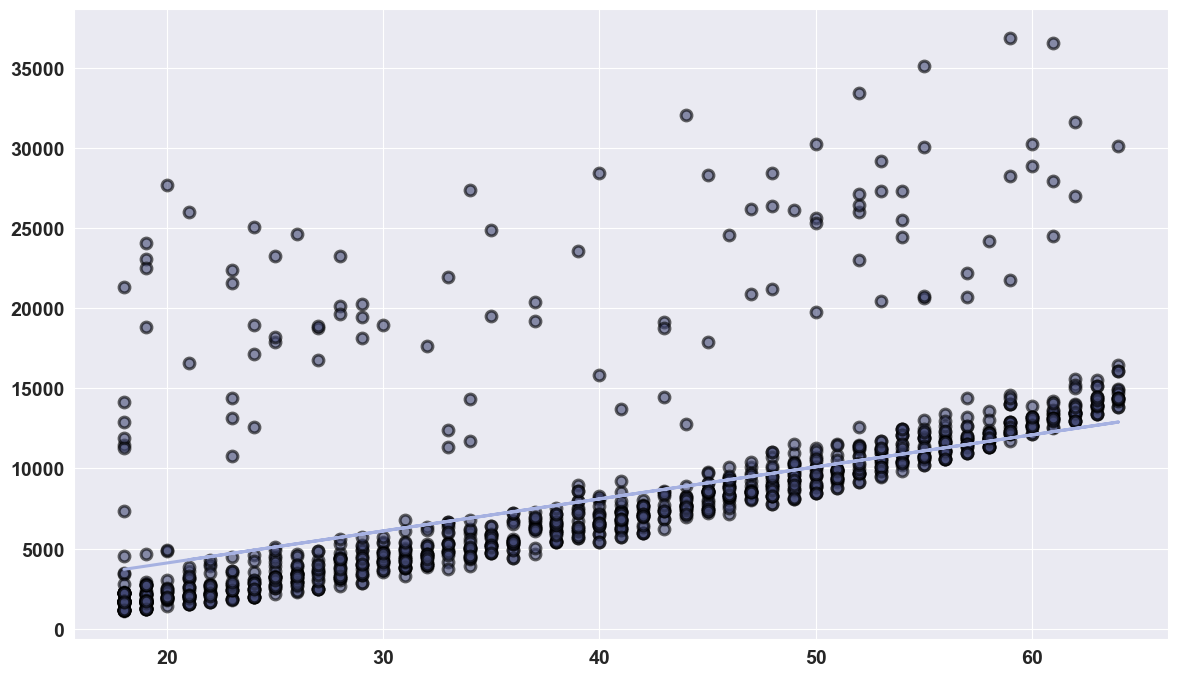

In [70]:
try_parameters(w=200, b=100)

In [60]:
# let's define a function to see how the model perform
def rmse(predictions: pd.Series, targets: pd.Series) -> float:
    return np.sqrt(np.mean(targets - predictions) ** 2)

In [ ]:
# let's also define the l1 loss function
def mae(predictions: pd.Series, targets: pd.Series) -> float:
    return np.mean(np.abs(targets - predictions))

In [ ]:
# let's define the mse loss function
def mse(targets: pd.Series, predictions: pd.Series) -> float:
    return np.mean((targets - predictions) ** 2)

In [61]:
# let's start some values of w and b
w = 200
b = 100

In [62]:
feature = non_smoker_df["age"]
target = non_smoker_df["charges"]

In [63]:
predicted_charges = estimate_charges(feature, w=w, b=b)

In [65]:
rmse(predictions=predicted_charges, targets=target)

np.float64(457.2006286832707)

In [ ]:
# now compute the l1_loss function
mae(targets=target, predictions=predicted_charges)

np.float64(2540.081870130639)

In [69]:
mse(targets=target, predictions=predicted_charges)

np.float64(22844136.47450992)

In [ ]:
# let's define another function to find the best parameters manually, for me to understand all the process


def try_parameters(w: float, b: float):
    ages = non_smoker_df["age"]
    target = non_smoker_df["charges"]
    predictions = estimate_charges(ages=ages, w=w, b=b)

    sns.scatterplot(x=ages, y=target, s=60, color="#D6E5E3", ec="k", lw=2.2)
    plt.plot(ages, predictions, lw=3, color="#424874", ls="-")
    plt.tight_layout()
    plt.show()

    loss = rmse(predictions=predictions, targets=target)
    print(f"The loss is: {loss}")

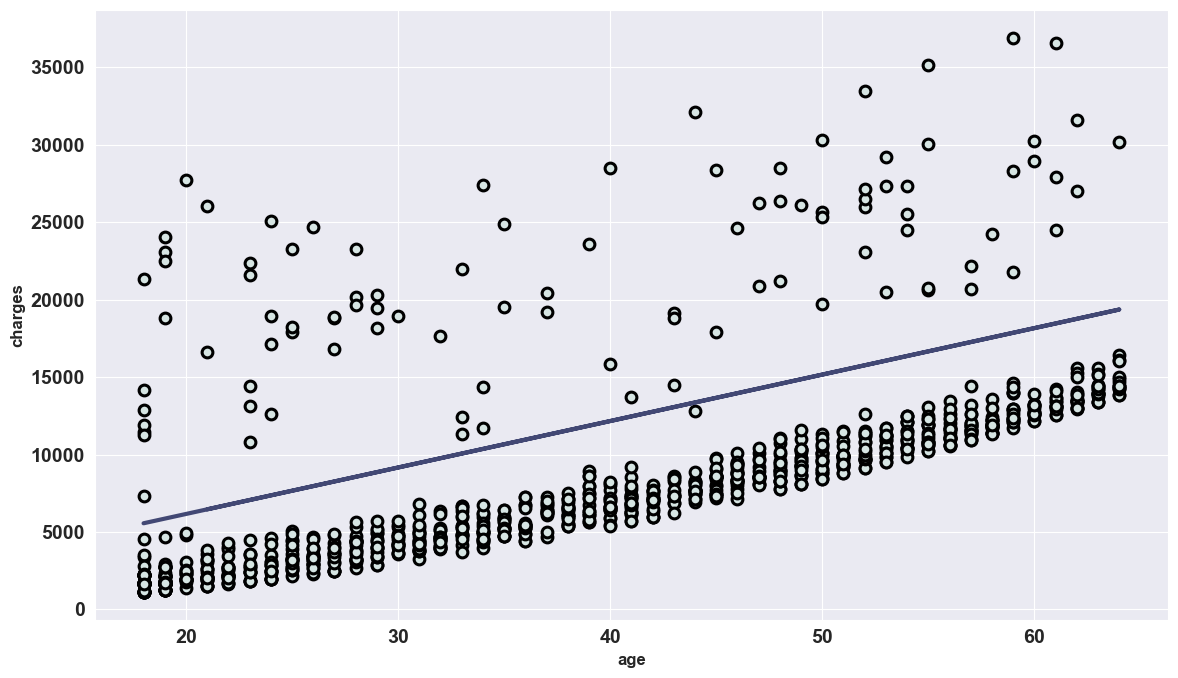

The loss is: 3541.333205903196


In [79]:
try_parameters(w=300, b=160)

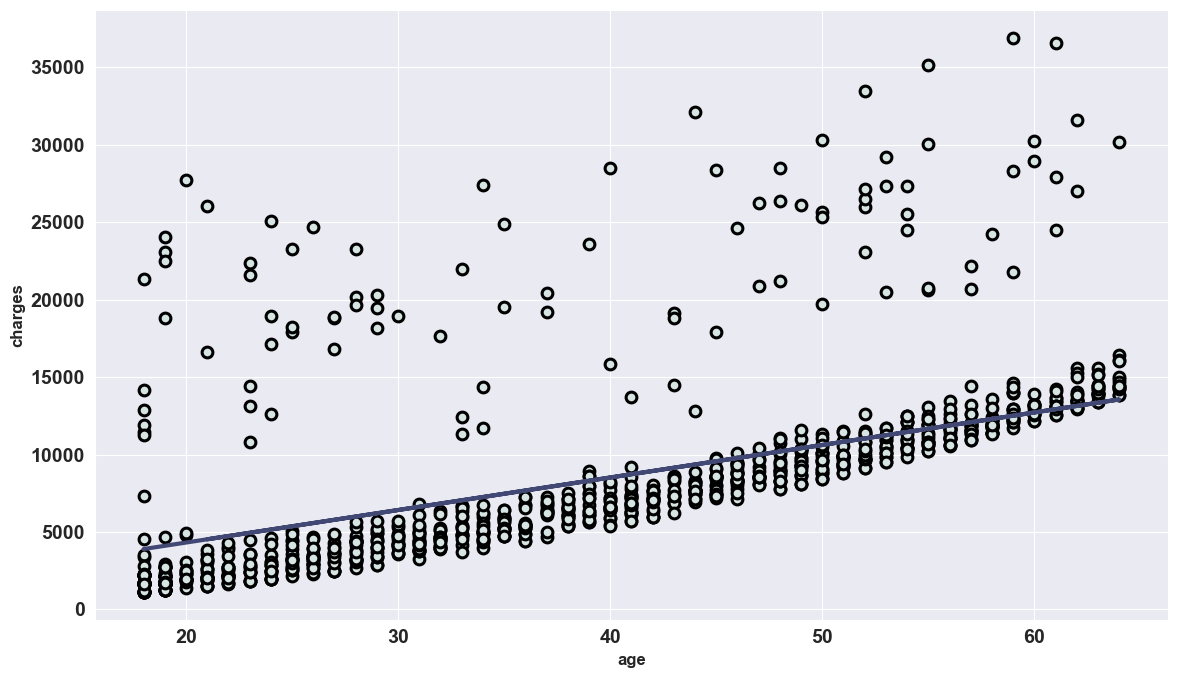

The loss is: 48.34724522462408


In [80]:
try_parameters(w=210, b=115)

### **so here we have the best values of the bias and the weight that produces the minimal loss: 48.347**

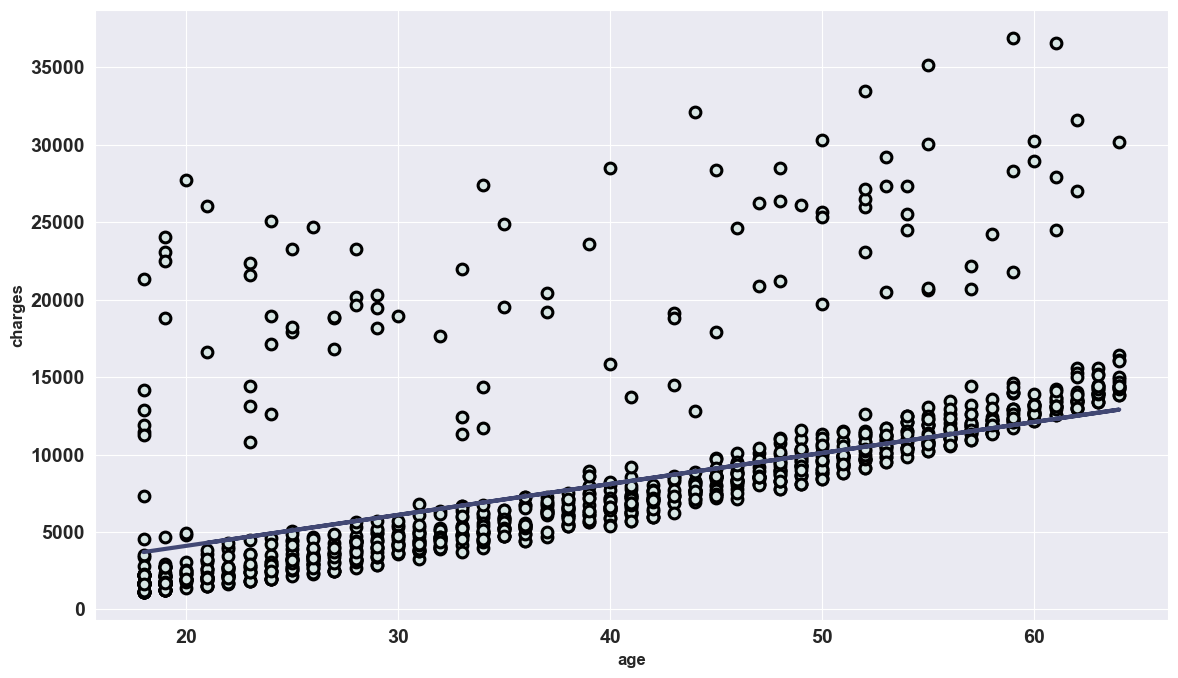

The loss is: 457.2006286832707


In [81]:
try_parameters(w=200, b=100)

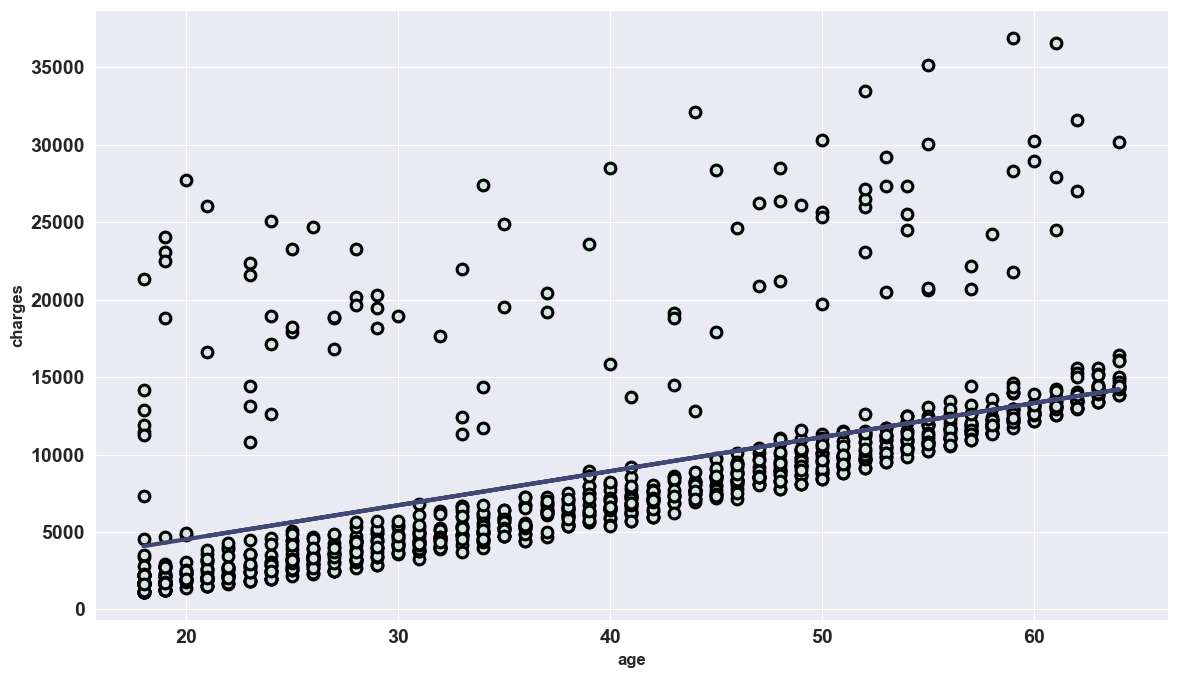

The loss is: 355.50613823402256


In [83]:
try_parameters(w=220, b=125)